In [2]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import numpy as np
import random
import math
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [27]:
n = 3
num_clauses = math.ceil(n / 3)
aux_num = num_clauses*2 + (num_clauses - 1)
variables = QuantumRegister(n, name='clauses')
auxes = QuantumRegister(aux_num, name='auxes')
U = QuantumCircuit(variables, auxes)
qubit_list = list(range(n))
not_list = []
for i in range(n):
    not_list.append(random.randint(0, 1))
random.shuffle(qubit_list)

#go through inner part of each clause
for i in range(num_clauses):
    first = qubit_list[i*3]
    second = qubit_list[i*3 + 1]
    third = qubit_list[i*3 + 2]
    first_aux = n + i * 2
    second_aux = 1 + n + i * 2

    #or the first two
    if (not not_list[i * 3]):
        U.x(first)
    if (not not_list[1 + i * 3]):
        U.x(second)
    U.x(first_aux)
    U.ccx(first, second, first_aux)
    if (not not_list[i * 3]):
        U.x(first)
    if (not not_list[1 + i * 3]):
        U.x(second)

    U.barrier()
    

    #or the result of the first two and the third
    U.x(first_aux)
    if (not not_list[2 + i * 3]):
        U.x(third)
    U.x(second_aux)
    U.ccx(first_aux, third, second_aux)
    U.x(first_aux)
    if (not not_list[2 + i * 3]):
        U.x(third)
    U.barrier()

#and each clause together
if (num_clauses > 1):

    U.ccx(auxes[1], auxes[3], auxes[num_clauses*2])
    for i in range(2, num_clauses):
        U.ccx(auxes[i*2 + 1], auxes[num_clauses*2 + (i - 2)], auxes[num_clauses*2 + (i - 1)])




print(qubit_list)
print(not_list)




[1, 0, 2]
[0, 0, 1]


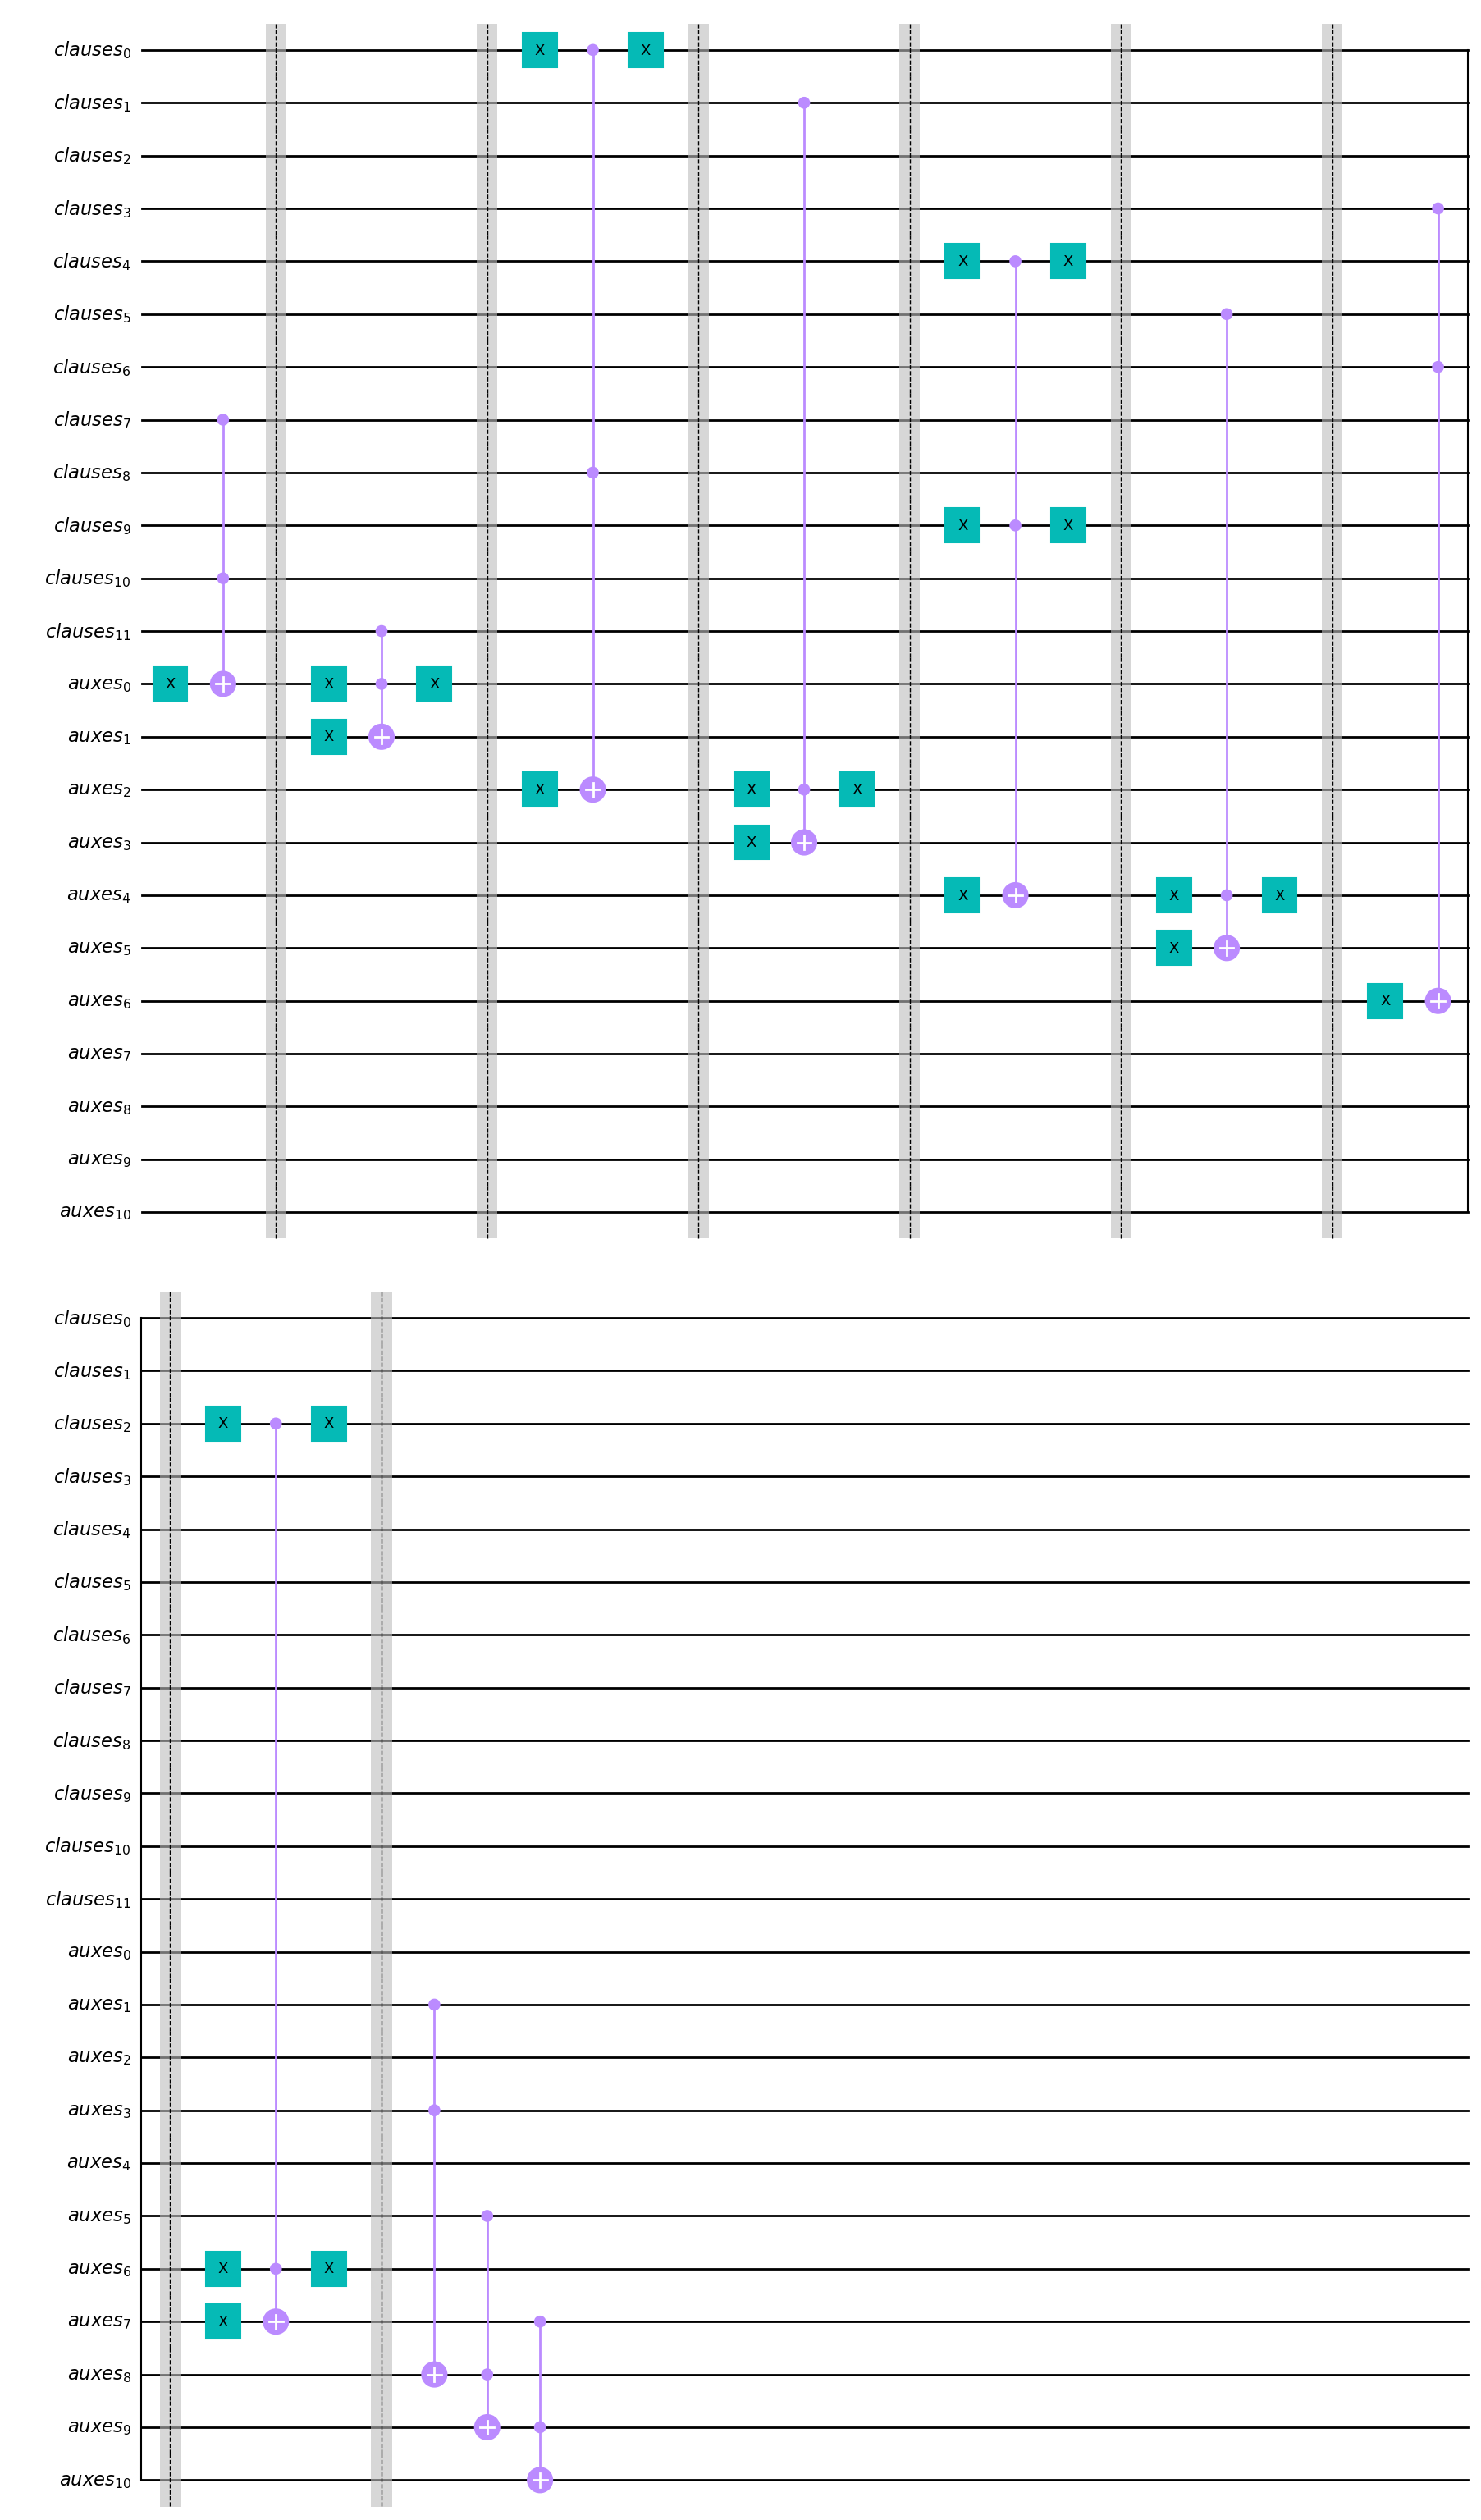

In [15]:
U.draw('mpl', filename='graph.png')


In [28]:
solutions = 0
for i in range(2 ** n):
    vals = []
    for j in range(n):
        vals.append((i >> j) & 1)

    result = 1
    for j in range(num_clauses):
        first = vals[j*3] ^ not_list[j*3]
        second = vals[j*3 + 1] ^ not_list[j*3 + 1]
        third = vals[j*3 + 2] ^ not_list[j*3 + 2]
        result &= (first | second | third)
    if result:
        solutions += 1
        #print(vals)
print(f'num_solutions is {solutions}')
print(not_list)

num_solutions is 7
[0, 0, 1]
